# Morpheus Sandbox

First test of actual morpheus being a thing.

## Preliminaries

In [1]:
import os
import sys
import numpy as np

from os.path import dirname
from networkx.drawing.nx_pydot import to_pydot

# Import morpheus
note_dir = os.getcwd()
root_dir = dirname(note_dir)
src_dir = os.path.join(root_dir, "src")

sys.path.append(src_dir)

import morpheus

from morpheus import Morpheus
from morpheus.tests import (default_dataset,
                            default_m_list_for_mercs,
                            random_m_list_for_mercs)

# Visuals
from morpheus.graph import to_dot
from IPython.display import Image, display
from IPython.core.display import HTML 

In [2]:
data, _ = default_dataset(random_state=10)
data.head()

,0,1,2,3,4,5,6,y
0,-0.481421,0.151874,-3.496227,0.060245,-3.203806,-1.372228,-2.347602,0
1,1.805053,1.513298,0.999596,3.624717,0.441319,-1.056231,-0.319972,1
2,3.131337,0.820474,4.246783,-2.461378,-1.855715,1.897367,-1.244252,0
3,-0.442853,0.934070,2.914762,-2.871647,0.216938,-2.183579,0.867336,0
4,0.369072,2.812554,-1.471211,0.518364,0.312299,-3.355049,-1.760576,0


In [3]:
data = data.values

## Fit

Here, I test whether or not it can fit something.

In [4]:
m = Morpheus()

In [5]:
m.fit(data)

In [6]:
m.m_list[:2]

[RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False)]

In [7]:
m.m_codes

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.]])

In [8]:
m.g_list

In [9]:
m.g_list[3].nodes(data=True)

NodeDataView({'d-00': {'bipartite': 'data', 'kind': 'data', 'idx': 0, 'tgt': [0], 'fi': 0.10313107401771344, 'shape': '"circle"'}, 'd-02': {'bipartite': 'data', 'kind': 'data', 'idx': 2, 'tgt': [2], 'fi': 0.1500486946605794, 'shape': '"circle"'}, 'd-03': {'bipartite': 'data', 'kind': 'data', 'idx': 3, 'tgt': [3], 'fi': 0.044570498831109404, 'shape': '"circle"'}, 'd-04': {'bipartite': 'data', 'kind': 'data', 'idx': 4, 'tgt': [4], 'fi': 0.028307476421643683, 'shape': '"circle"'}, 'd-05': {'bipartite': 'data', 'kind': 'data', 'idx': 5, 'tgt': [5], 'fi': 0.5437290790294689, 'shape': '"circle"'}, 'd-06': {'bipartite': 'data', 'kind': 'data', 'idx': 6, 'tgt': [6], 'fi': 0.10668542082531678, 'shape': '"circle"'}, 'd-07': {'bipartite': 'data', 'kind': 'data', 'idx': 7, 'tgt': [7], 'fi': 0.023527756214168204, 'shape': '"circle"'}, 'd-01': {'bipartite': 'data', 'kind': 'data', 'idx': 1, 'tgt': [1], 'shape': '"circle"'}, 'f-03': {'bipartite': 'func', 'kind': 'model', 'idx': 3, 'mod': RandomForest

## Predict

Now testing our prediction functionalities.

In [10]:
q_code = np.array([0,0,0,0,0,0,0,1])

In [16]:
f_list = m.predict(data, q_code)

['d-06', 'd-05', 'd-04', 'd-03', 'd-02', 'd-01', 'd-00', 'f-04', 'd-07']
d-06
d-05
d-04
d-03
d-02
d-01
d-00
f-04
dict_keys(['d-06', 'd-05', 'd-04', 'd-03', 'd-02', 'd-01', 'd-00'])
d-07


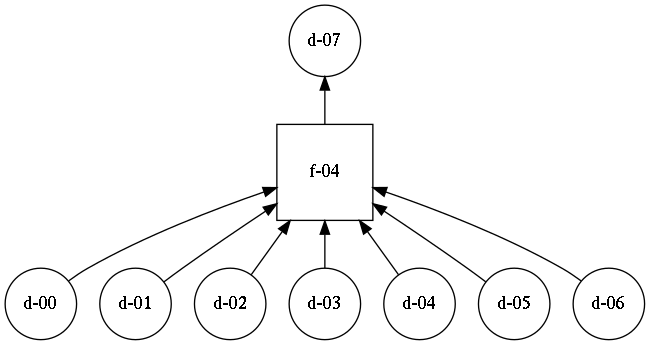

In [14]:
# show your work
q_grph = m.q_grph
fname = to_dot(q_grph, fname='q')
!dot -T png ./tmp/q.dot > ./tmp/q.png  # Bash command (This can be done nicer, but is tricky)

display(Image('tmp/q.png'))

In [17]:
f_list['d-07'](data)

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1.